# ECMWF xr object load

## Opens 2024-12 ecmwf dataset

Displays dataset as xr object

In [1]:

import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Open dataset for pressure
pressure_ds = xr.open_dataset(r"dataset_ecmwf_main\2024\12\era5_pressure_202412.nc", engine="h5netcdf")
#t2m = ds['t2m']  # (valid_time, lat, lon)

single_accum_ds = xr.open_dataset(r"dataset_ecmwf_main\2024\12\data_stream-oper_stepType-accum.nc", engine="h5netcdf")

single_instant_ds = xr.open_dataset(r"dataset_ecmwf_main\2024\12\data_stream-oper_stepType-instant.nc", engine="h5netcdf")


In [2]:
pressure_ds
#pressure_ds.coords
#attrs change to 0.25 specify

<xarray.Dataset> Size: 49MB
Dimensions:         (valid_time: 744, pressure_level: 3, latitude: 41,
                     longitude: 45)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 6kB 2024-12-01 ... 2024-12-31...
  * pressure_level  (pressure_level) float64 24B 1e+03 850.0 500.0
  * latitude        (latitude) float64 328B -26.0 -26.25 -26.5 ... -35.75 -36.0
  * longitude       (longitude) float64 360B 113.0 113.2 113.5 ... 123.8 124.0
    number          int64 8B ...
    expver          (valid_time) <U4 12kB ...
Data variables:
    w               (valid_time, pressure_level, latitude, longitude) float32 16MB ...
    q               (valid_time, pressure_level, latitude, longitude) float32 16MB ...
    r               (valid_time, pressure_level, latitude, longitude) float32 16MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-18T14:20 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
single_instant_ds
#single_accum_ds["valid_time"].values

<xarray.Dataset> Size: 55MB
Dimensions:     (valid_time: 744, latitude: 41, longitude: 45)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 6kB 2024-12-01 ... 2024-12-31T23:...
  * latitude    (latitude) float64 328B -26.0 -26.25 -26.5 ... -35.75 -36.0
  * longitude   (longitude) float64 360B 113.0 113.2 113.5 ... 123.5 123.8 124.0
    number      int64 8B ...
    expver      (valid_time) <U4 12kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 5MB ...
    d2m         (valid_time, latitude, longitude) float32 5MB ...
    sp          (valid_time, latitude, longitude) float32 5MB ...
    tcc         (valid_time, latitude, longitude) float32 5MB ...
    lcc         (valid_time, latitude, longitude) float32 5MB ...
    mcc         (valid_time, latitude, longitude) float32 5MB ...
    hcc         (valid_time, latitude, longitude) float32 5MB ...
    u10         (valid_time, latitude, longitude) float32 5MB ...
    v10         (valid_time, latitude, longitude) float32 5MB ...
    cape        (valid_time, latitude, longitude) float32 5MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-18T14:11 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
single_instant_ds.u10.values

array([[[ 1.4589539 ,  1.4941101 ,  1.5380554 , ..., -5.0400696 ,
         -5.3105774 , -5.4775696 ],
        [ 1.3466492 ,  1.2597351 ,  1.3105164 , ..., -3.5576477 ,
         -3.8379211 , -4.1787415 ],
        [ 1.3017273 ,  1.1269226 ,  1.079071  , ..., -2.3281555 ,
         -2.5508118 , -2.7998352 ],
        ...,
        [11.160126  , 11.033173  , 10.894501  , ..., -0.882843  ,
         -2.5986633 , -3.9726868 ],
        [11.43454   , 11.495087  , 11.42868   , ..., -0.882843  ,
         -2.2910461 , -3.608429  ],
        [11.685516  , 11.771454  , 11.899384  , ..., -0.53616333,
         -1.905304  , -3.1025696 ]],

       [[ 1.7973175 ,  1.9545441 ,  1.9672394 , ..., -4.2769012 ,
         -4.533737  , -4.9233856 ],
        [ 1.7748566 ,  1.7201691 ,  1.7475128 , ..., -2.8872528 ,
         -3.0981903 , -3.4585419 ],
        [ 1.6498566 ,  1.5102081 ,  1.6107941 , ..., -1.5688934 ,
         -1.7456512 , -2.0151825 ],
        ...,
        [11.724075  , 11.644974  , 11.524857  , ...,  

In [5]:
import pandas as pd
import numpy as np
pd.to_datetime(single_accum_ds["valid_time"].values)
unique_days= np.unique(single_accum_ds["valid_time"].dt.date)

unique_days

array([datetime.date(2024, 12, 1), datetime.date(2024, 12, 2),
       datetime.date(2024, 12, 3), datetime.date(2024, 12, 4),
       datetime.date(2024, 12, 5), datetime.date(2024, 12, 6),
       datetime.date(2024, 12, 7), datetime.date(2024, 12, 8),
       datetime.date(2024, 12, 9), datetime.date(2024, 12, 10),
       datetime.date(2024, 12, 11), datetime.date(2024, 12, 12),
       datetime.date(2024, 12, 13), datetime.date(2024, 12, 14),
       datetime.date(2024, 12, 15), datetime.date(2024, 12, 16),
       datetime.date(2024, 12, 17), datetime.date(2024, 12, 18),
       datetime.date(2024, 12, 19), datetime.date(2024, 12, 20),
       datetime.date(2024, 12, 21), datetime.date(2024, 12, 22),
       datetime.date(2024, 12, 23), datetime.date(2024, 12, 24),
       datetime.date(2024, 12, 25), datetime.date(2024, 12, 26),
       datetime.date(2024, 12, 27), datetime.date(2024, 12, 28),
       datetime.date(2024, 12, 29), datetime.date(2024, 12, 30),
       datetime.date(2024, 12, 31)

In [6]:
import zipfile
from pathlib import Path

zip_path= Path("dataset_ecmwf_2024\11\era5_single_202411.nc")

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(zip_path.parent)


#All ecmwf_extra* data is irrelevant to our study
extra1_accum_ds = xr.open_dataset(r"dataset_ecmwf_extra1_202412\data_stream-oper_stepType-accum.nc", engine="h5netcdf")
extra1_instant_ds = xr.open_dataset(r"dataset_ecmwf_extra1_202412\data_stream-oper_stepType-instant.nc", engine="h5netcdf")
extra2_accum_ds = xr.open_dataset(r"dataset_ecmwf_extra2_202412\data_stream-oper_stepType-accum.nc", engine="h5netcdf")
extra2_instant_ds = xr.open_dataset(r"dataset_ecmwf_extra2_202412\data_stream-oper_stepType-instant.nc", engine="h5netcdf")


<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\John\AppData\Local\Temp\ipykernel_10596\941092009.py:4: SyntaxWarning: invalid escape sequence '\e'
  zip_path= Path("dataset_ecmwf_2024\11\era5_single_202411.nc")
C:\Users\John\AppData\Local\Temp\ipykernel_10596\941092009.py:4: SyntaxWarning: invalid escape sequence '\e'
  zip_path= Path("dataset_ecmwf_2024\11\era5_single_202411.nc")


OSError: [Errno 22] Invalid argument: 'dataset_ecmwf_2024\t\\era5_single_202411.nc'

In [7]:
display(extra2_accum_ds)

NameError: name 'extra2_accum_ds' is not defined

In [15]:
ds= xr.open_dataset(r"dataset_ecmwf_clean_test\2024-v1\11\20241102.nc")
ds
#ds

Feb2020_ds= xr.open_dataset(r"dataset_ecmwf_clean_test\2020-v2\02\20200202.nc")
Feb2020_ds.var





<bound method DatasetAggregations.var of <xarray.Dataset> Size: 2MB
Dimensions:     (valid_time: 24, latitude: 41, longitude: 45)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 192B 2020-02-02 ... 2020-02-02T23...
  * latitude    (latitude) float64 328B -26.0 -26.25 -26.5 ... -35.75 -36.0
  * longitude   (longitude) float64 360B 113.0 113.2 113.5 ... 123.5 123.8 124.0
    number      int64 8B ...
    expver      (valid_time) <U4 384B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 177kB ...
    d2m         (valid_time, latitude, longitude) float32 177kB ...
    sp          (valid_time, latitude, longitude) float32 177kB ...
    tcc         (valid_time, latitude, longitude) float32 177kB ...
    lcc         (valid_time, latitude, longitude) float32 177kB ...
    mcc         (valid_time, latitude, longitude) float32 177kB ...
    hcc         (valid_time, latitude, longitude) float32 177kB ...
    u10         (valid_time, latitude, longitude) float3

## Cartopy ECMWF visualisation

dataset_ecmwf_clean_test is alr ran with ecmwf_clean.py

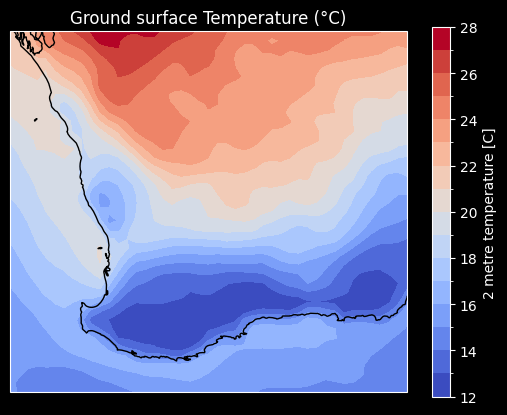

In [21]:
#fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=ccrs.PlateCarree())

ds.t2m.isel(valid_time=0).plot.contourf(
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=20,
    cmap="coolwarm"
)

ax.coastlines()
ax.set_title("Ground surface Temperature (°C)")
plt.show()